In [ ]:
#    For downloading the data set from kagel
# ===============================
!pip install tensorflow keras kaggle

# ===============================
 #Upload Kaggle API Key

from google.colab import files
files.upload()  # Upload kaggle.json

# ===============================
#  Setup Kaggle API
# ===============================
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d ddeineka/fer2013
!unzip -o fer2013.zip -d fer2013


In [ ]:
#unzip the dtaa set
!unzip -o /content/fer2013.zip -d /content/fer2013

Streaming output truncated to the last 5000 lines.
 extracting: /content/fer2013/fer2013/train/sad/Training_65267116.jpg  
 extracting: /content/fer2013/fer2013/train/sad/Training_65275626.jpg  
 extracting: /content/fer2013/fer2013/train/sad/Training_6529266.jpg  
 extracting: /content/fer2013/fer2013/train/sad/Training_65329617.jpg  
 extracting: /content/fer2013/fer2013/train/sad/Training_65338712.jpg  
 extracting: /content/fer2013/fer2013/train/sad/Training_65338797.jpg  
 extracting: /content/fer2013/fer2013/train/sad/Training_65387162.jpg  
 extracting: /content/fer2013/fer2013/train/sad/Training_65404494.jpg  
 extracting: /content/fer2013/fer2013/train/sad/Training_65426218.jpg  
 extracting: /content/fer2013/fer2013/train/sad/Training_65430136.jpg  
 extracting: /content/fer2013/fer2013/train/sad/Training_65437377.jpg  
 extracting: /content/fer2013/fer2013/train/sad/Training_6545735.jpg  
 extracting: /content/fer2013/fer2013/train/sad/Training_65463385.jpg  
 extracting: /c

In [ ]:
#Reads images in grayscale.
#Resizes each to 48x48 pixels.
#Reshapes for CNN input (48x48x1 for grayscale).
#Splits the data into training (80%) and test (20%) sets.
import os
import cv2
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define the path to the extracted data
data_dir = '/content/fer2013/fer2013/train'

# Define the emotion labels
emotion_labels = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'sad': 4,
    'surprise': 5,
    'neutral': 6
}

# Initialize empty lists for images and labels
images = []
labels = []

# Loop over each emotion folder
for emotion, label in emotion_labels.items():
    emotion_path = os.path.join(data_dir, emotion)

    # Ensure the emotion directory exists
    if not os.path.exists(emotion_path):
        print(f"Directory not found: {emotion_path}")
        continue

    for img_name in os.listdir(emotion_path):
        img_path = os.path.join(emotion_path, img_name)

        # Skip non-image files
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            continue

        # Read the image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Check if image was loaded correctly
        if img is None:
            print(f"Warning: Could not read image {img_path}")
            continue

        # Resize and normalize
        img = cv2.resize(img, (48, 48))  # Resize to 48x48
        img = img / 255.0  # Normalize pixel values

        # Append to lists
        images.append(img)
        labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images).reshape(-1, 48, 48, 1)  # Reshape for CNN input
labels = to_categorical(labels, num_classes=7)    # One-hot encode the labels

# Split into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print data shapes
print(f'X_train shape: {x_train.shape}')
print(f'Y_train shape: {y_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'Y_test shape: {y_test.shape}')


X_train shape: (23475, 48, 48, 1)
Y_train shape: (23475, 7)
X_test shape: (5869, 48, 48, 1)
Y_test shape: (5869, 7)


In [ ]:
# for train the model on data set
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  # 7 emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save the model
model.save('face_expression_model.h5')
print("Model saved as face_expression_model.h5")


Epoch 1/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 142s 477ms/step - accuracy: 0.2642 - loss: 1.7944 - val_accuracy: 0.3646 - val_loss: 1.6186
Epoch 2/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 142s 475ms/step - accuracy: 0.3942 - loss: 1.5532 - val_accuracy: 0.4394 - val_loss: 1.4717
Epoch 3/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 140s 477ms/step - accuracy: 0.4556 - loss: 1.4334 - val_accuracy: 0.4748 - val_loss: 1.3801
Epoch 4/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 142s 479ms/step - accuracy: 0.4950 - loss: 1.3384 - val_accuracy: 0.4824 - val_loss: 1.3506
Epoch 5/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 141s 475ms/step - accuracy: 0.5075 - loss: 1.2849 - val_accuracy: 0.4931 - val_loss: 1.3267
Epoch 6/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 141s 473ms/step - accuracy: 0.5307 - loss: 1.2320 - val_accuracy: 0.5120 - val_loss: 1.2954
Epoch 7/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 143s 487ms/step - accuracy: 0.5483 - loss: 1.1783 - val_accuracy: 0.5146 - val_loss: 1.2948
Epoch 8/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 198s 473ms/step - accuracy: 0.5721 -

Test Accuracy: 53.35%
Model saved as face_expression_model.h5


In [ ]:
#this code is to access the live webcam and then process the image and show result
# ===============================
!pip install tensorflow opencv-python pillow --quiet

# ===============================
# Step 2: Import libraries
# ===============================
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import cv2
import PIL.Image
import io
import numpy as np
import base64
from keras.models import load_model

# ===============================
# Step 3: Take photo using webcam
# ===============================
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📷 Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js(f'takePhoto({quality})')
    binary = io.BytesIO(base64.b64decode(data.split(',')[1]))
    img = PIL.Image.open(binary)
    img.save(filename)
    return filename

# ===============================
# Step 4: Load the trained model
# ===============================
model = load_model('face_expression_model.h5')

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# ===============================
# Step 5: Capture photo
# ===============================
filename = take_photo()
display(Image(filename=filename))

# ===============================
# Step 6: Detect face and predict emotion
# ===============================
# Load image in grayscale
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load OpenCV's face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Predict emotion for each detected face
for (x, y, w, h) in faces:
    face = gray[y:y+h, x:x+w]
    face = cv2.resize(face, (48, 48))
    face = face / 255.0
    face = face.reshape(1, 48, 48, 1)

    pred = model.predict(face)
    emotion = emotion_labels[np.argmax(pred)]

    # Draw bounding box and label
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(img, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

# Save and display result
cv2.imwrite('emotion_result.jpg', img)
display(Image(filename='emotion_result.jpg'))


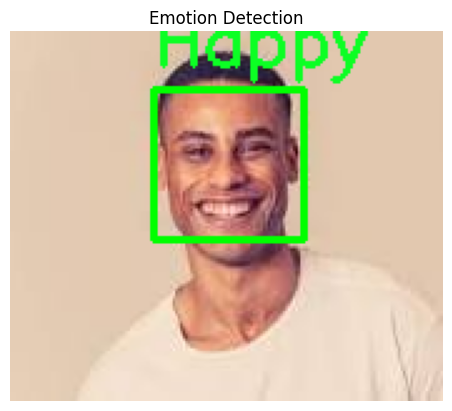

In [ ]:
# ========the below code is to selct custom image form data =======================
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import img_to_array

# ===============================
# Step 2: Load your trained model
# ===============================
model = load_model('face_expression_model.h5')

# Emotion class labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# ===============================
# Step 3: Load and process an image
# ===============================
image_path = '/content/download (1).jfif'  # <----------provide the path of image here to check

# Load image and convert to grayscale
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# ===============================
# Step 4: Detect emotion on face(s)
# ===============================
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_gray = cv2.resize(roi_gray, (48, 48))
    roi_gray = roi_gray.astype('float') / 255.0
    roi_gray = img_to_array(roi_gray)
    roi_gray = np.expand_dims(roi_gray, axis=0)

    # Predict emotion
    preds = model.predict(roi_gray, verbose=0)
    emotion = emotion_labels[np.argmax(preds)]

    # Draw results
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

# ===============================
# Step 5: Display image with prediction
# ===============================
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Emotion Detection")
plt.show()


In [ ]:
# Install dependencies
!pip install fastapi uvicorn nest-asyncio pyngrok tensorflow opencv-python pillow python-multipart

from fastapi import FastAPI, UploadFile, File
from fastapi.responses import JSONResponse
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio
from pyngrok import ngrok
import uvicorn
import cv2
import numpy as np
from PIL import Image
import base64
from io import BytesIO
from tensorflow.keras.models import load_model

# Authenticate ngrok with your token
!ngrok authtoken 2ooVSArigThjicsSmpI3C57nvC1_6tzPbFvfp8kdZVAe3joSV

# Enable nested event loop to run FastAPI inside Colab
nest_asyncio.apply()

app = FastAPI()

# Add CORS middleware to allow frontend access
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # you can restrict this to your frontend URL
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# Load your model (make sure face_expression_model.h5 is uploaded to Colab)
model = load_model('/content/face_expression_model (1).h5')
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

@app.post("/predict-emotion")
async def predict_emotion(file: UploadFile = File(...)):
    print(f"Received file: {file.filename}, Content-Type: {file.content_type}")
    contents = await file.read()
    print(f"File size: {len(contents)} bytes")

    img = Image.open(BytesIO(contents)).convert("RGB")
    img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    emotions = []
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (48, 48))
        face = face / 255.0
        face = face.reshape(1, 48, 48, 1)
        pred = model.predict(face)
        emotion = emotion_labels[np.argmax(pred)]
        emotions.append(emotion)

        cv2.rectangle(img_cv, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img_cv, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    _, buffer = cv2.imencode('.jpg', img_cv)
    result_img_base64 = base64.b64encode(buffer).decode("utf-8")

    return JSONResponse({"image": result_img_base64, "emotions": emotions})

# Open a tunnel to the internet with ngrok
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

# Run FastAPI app (this will block the cell, so run at the end)
uvicorn.run(app, host="0.0.0.0", port=8000)
